In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

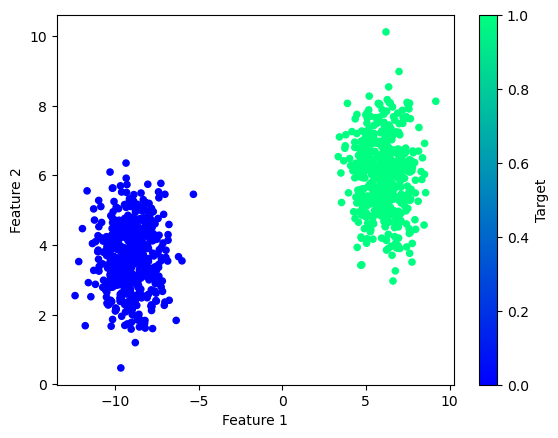

In [3]:
# Generate a dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"]= y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

2023-01-07 17:02:15.645384: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 17:02:15.646322: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 705us/sample - loss: 12.7675 - accuracy: 0.0653
Epoch 2/100
750/750 [==============================] - 0s 35us/sample - loss: 12.6479 - accuracy: 0.0733
Epoch 3/100
750/750 [==============================] - 0s 34us/sample - loss: 12.4729 - accuracy: 0.0827
Epoch 4/100
750/750 [==============================] - 0s 33us/sample - loss: 12.3206 - accuracy: 0.0853
Epoch 5/100
750/750 [==============================] - 0s 34us/sample - loss: 12.2493 - accuracy: 0.0893
Epoch 6/100
750/750 [==============================] - 0s 35us/sample - loss: 12.1888 - accuracy: 0.0933
Epoch 7/100
750/750 [==============================] - 0s 34us/sample - loss: 12.0910 - accuracy: 0.0973
Epoch 8/100
750/750 [==============================] - 0s 34us/sample - loss: 12.0421 - accuracy: 0.1027
Epoch 9/100
750/750 [==============================] - 0s 33us/sample - loss: 11.9371 - accuracy: 0.1080
Epoch 10/100
750/750 [===========

750/750 [==============================] - 0s 34us/sample - loss: 7.4867 - accuracy: 0.4280
Epoch 79/100
750/750 [==============================] - 0s 34us/sample - loss: 7.4149 - accuracy: 0.4480
Epoch 80/100
750/750 [==============================] - 0s 33us/sample - loss: 7.4032 - accuracy: 0.4493
Epoch 81/100
750/750 [==============================] - 0s 32us/sample - loss: 7.4018 - accuracy: 0.4507
Epoch 82/100
750/750 [==============================] - 0s 35us/sample - loss: 7.4012 - accuracy: 0.4507
Epoch 83/100
750/750 [==============================] - 0s 34us/sample - loss: 7.4006 - accuracy: 0.4507
Epoch 84/100
750/750 [==============================] - 0s 34us/sample - loss: 7.4001 - accuracy: 0.4507
Epoch 85/100
750/750 [==============================] - 0s 33us/sample - loss: 7.3995 - accuracy: 0.4507
Epoch 86/100
750/750 [==============================] - 0s 32us/sample - loss: 7.3989 - accuracy: 0.4520
Epoch 87/100
750/750 [==============================] - 0s 33us/samp

<AxesSubplot:>

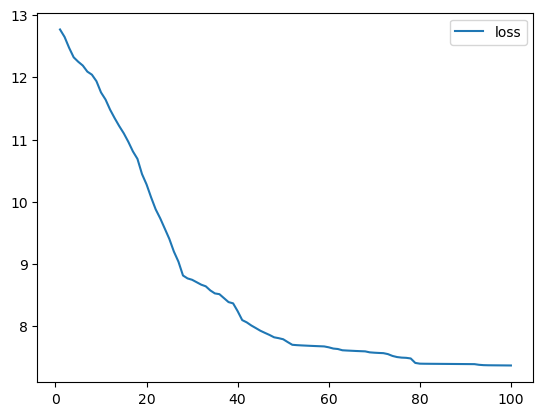

In [13]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# plot the loss 
history_df.plot(y="loss")

In [14]:
# Plot the accuracy

<AxesSubplot:>

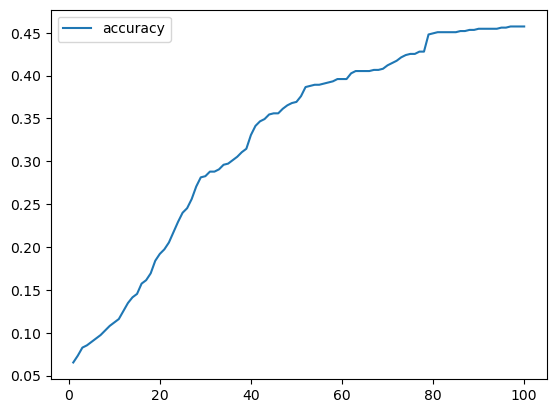

In [15]:
history_df.plot(y="accuracy")

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 6.9945 - accuracy: 0.3840
Loss: 7.8826304702758785, Accuracy: 0.3840000033378601


In [22]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [23]:
from sklearn.datasets import make_moons

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

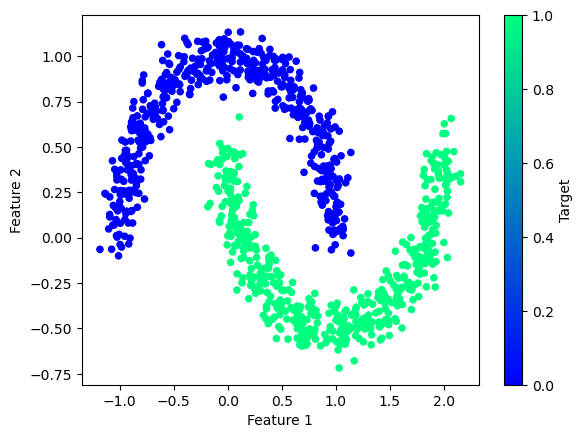

In [25]:
# creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [27]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [28]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 78us/sample - loss: 2.5989 - accuracy: 0.7187
Epoch 2/100
750/750 [==============================] - 0s 34us/sample - loss: 2.5605 - accuracy: 0.7200
Epoch 3/100
750/750 [==============================] - 0s 34us/sample - loss: 2.5548 - accuracy: 0.7213
Epoch 4/100
750/750 [==============================] - 0s 35us/sample - loss: 2.5515 - accuracy: 0.7213
Epoch 5/100
750/750 [==============================] - 0s 36us/sample - loss: 2.5485 - accuracy: 0.7213
Epoch 6/100
750/750 [==============================] - 0s 35us/sample - loss: 2.5204 - accuracy: 0.7213
Epoch 7/100
750/750 [==============================] - 0s 34us/sample - loss: 2.4988 - accuracy: 0.7213
Epoch 8/100
750/750 [==============================] - 0s 34us/sample - loss: 2.4896 - accuracy: 0.7240
Epoch 9/100
750/750 [==============================] - 0s 35us/sample - loss: 2.4728 - accuracy: 0.7267
Epoch 10/100
750/750 [=====================

750/750 [==============================] - 0s 34us/sample - loss: 1.5027 - accuracy: 0.8040
Epoch 79/100
750/750 [==============================] - 0s 32us/sample - loss: 1.4433 - accuracy: 0.8040
Epoch 80/100
750/750 [==============================] - 0s 35us/sample - loss: 1.4400 - accuracy: 0.8040
Epoch 81/100
750/750 [==============================] - 0s 36us/sample - loss: 1.4396 - accuracy: 0.8040
Epoch 82/100
750/750 [==============================] - 0s 34us/sample - loss: 1.4393 - accuracy: 0.8040
Epoch 83/100
750/750 [==============================] - 0s 34us/sample - loss: 1.4390 - accuracy: 0.8040
Epoch 84/100
750/750 [==============================] - 0s 34us/sample - loss: 1.4388 - accuracy: 0.8040
Epoch 85/100
750/750 [==============================] - 0s 37us/sample - loss: 1.4385 - accuracy: 0.8040
Epoch 86/100
750/750 [==============================] - 0s 33us/sample - loss: 1.4383 - accuracy: 0.8040
Epoch 87/100
750/750 [==============================] - 0s 33us/samp

<AxesSubplot:>

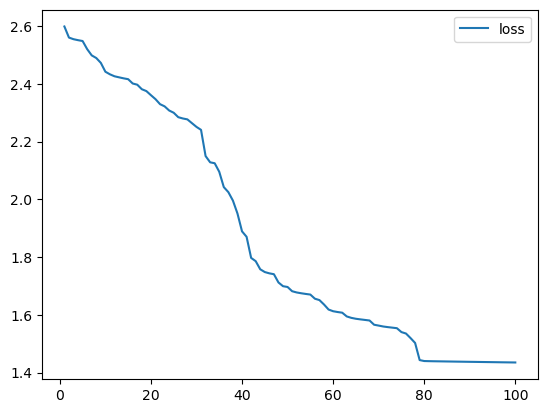

In [29]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

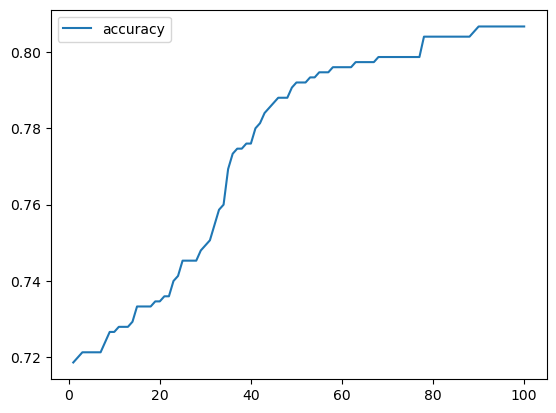

In [30]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [31]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [33]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [34]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 623us/sample - loss: 0.6992 - accuracy: 0.5173
Epoch 2/100
750/750 [==============================] - 0s 34us/sample - loss: 0.6528 - accuracy: 0.5613
Epoch 3/100
750/750 [==============================] - 0s 35us/sample - loss: 0.6134 - accuracy: 0.6093
Epoch 4/100
750/750 [==============================] - 0s 35us/sample - loss: 0.5803 - accuracy: 0.6587
Epoch 5/100
750/750 [==============================] - 0s 35us/sample - loss: 0.5505 - accuracy: 0.6920
Epoch 6/100
750/750 [==============================] - 0s 36us/sample - loss: 0.5231 - accuracy: 0.7053
Epoch 7/100
750/750 [==============================] - 0s 35us/sample - loss: 0.4973 - accuracy: 0.7373
Epoch 8/100
750/750 [==============================] - 0s 36us/sample - loss: 0.4724 - accuracy: 0.7653
Epoch 9/100
750/750 [==============================] - 0s 35us/sample - loss: 0.4482 - accuracy: 0.8160
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 35us/sample - loss: 0.2141 - accuracy: 0.9147
Epoch 79/100
750/750 [==============================] - 0s 37us/sample - loss: 0.2132 - accuracy: 0.9147
Epoch 80/100
750/750 [==============================] - 0s 36us/sample - loss: 0.2123 - accuracy: 0.9147
Epoch 81/100
750/750 [==============================] - 0s 34us/sample - loss: 0.2114 - accuracy: 0.9147
Epoch 82/100
750/750 [==============================] - 0s 34us/sample - loss: 0.2104 - accuracy: 0.9147
Epoch 83/100
750/750 [==============================] - 0s 34us/sample - loss: 0.2094 - accuracy: 0.9147
Epoch 84/100
750/750 [==============================] - 0s 34us/sample - loss: 0.2084 - accuracy: 0.9147
Epoch 85/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2074 - accuracy: 0.9147
Epoch 86/100
750/750 [==============================] - 0s 34us/sample - loss: 0.2064 - accuracy: 0.9147
Epoch 87/100
750/750 [==============================] - 0s 37us/samp